boosting methods are not ML algorithms
</br>
these are techniques that are applied on other algorithms to improve their performance and 
</br>
boosting methods are used on weak models in which their evaluation is not good

for bineries classification we use AdaptiveBoosting
</br>
AdaBoost is an ensemble learning method like RandomForest(it boosts DesicionTree)
</br>|
</br>
**there are 2 techniqes in AdaptiveBoosting:**
1. Parallel Learners --> works like RandomForest
2. Sequential Learners --> creates different models and the mistakes of previous models are learned by their successors(next models). 
   it creates dependencies between models unlike(RandomForest) it puts a wights on the previous model mistakes so the next model learns from the previous model mistakes and focus more on them.
   </br></br> more accuracy --> more wight

**Type of Boosting Algorithms:**
1. AdaBoost
2. Gradient Tree Boosting
3. XGBoost

it combines several weak models together to create a strong model(classifiers)
weak model can be created by descision tree or logistic regression or others..
</br>
a descision tree with one node and 2 leaves e.g.(base model for boosting methods and it's called Descion Stumps)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('mushrooms.csv')
print(df.shape)
df.head()
# there are 2 calesses. p --> poisonous , e --> not poisonous
# all our features are strings

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

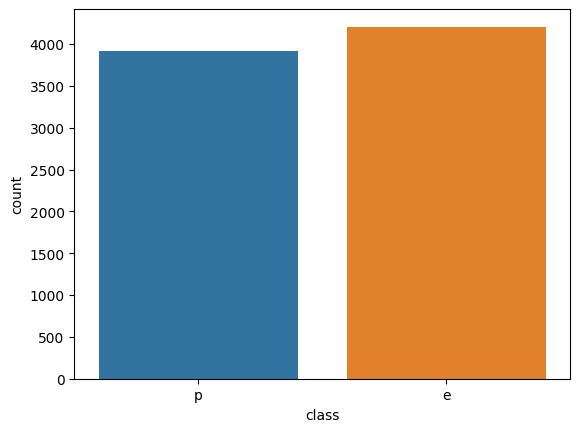

In [8]:
sns.countplot(data=df, x='class', hue='class');

In [32]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [45]:
a = df.describe().transpose()
a

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [48]:
a.iloc[0]


count     8124
unique       2
top          e
freq      4208
Name: class, dtype: object

In [49]:
# reset_index() add a column, named index to df and the values are the indexes of the dataframe and the new indexes will be numbers 
df.describe().transpose().reset_index() 

,index,count,unique,top,freq
0,class,8124,2,e,4208
1,cap-shape,8124,6,x,3656
2,cap-surface,8124,4,y,3244
3,cap-color,8124,10,n,2284
4,bruises,8124,2,f,4748
5,odor,8124,9,n,3528
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
9,gill-color,8124,12,b,1728


In [37]:
feat_unique = df.describe().transpose().reset_index().sort_values(by='unique')
feat_unique

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


In [42]:
feat_unique.index

Index([16,  0,  4,  6,  7,  8, 10, 18,  2, 17, 13, 12, 19, 11,  1, 21, 22, 14,
       15,  5, 20,  3,  9],
      dtype='int64')

In [43]:
feat_unique.loc[0]

index     class
count      8124
unique        2
top           e
freq       4208
Name: 0, dtype: object

In [44]:
feat_unique['index']

16                   veil-type
0                        class
4                      bruises
6              gill-attachment
7                 gill-spacing
8                    gill-size
10                 stalk-shape
18                 ring-number
2                  cap-surface
17                  veil-color
13    stalk-surface-below-ring
12    stalk-surface-above-ring
19                   ring-type
11                  stalk-root
1                    cap-shape
21                  population
22                     habitat
14      stalk-color-above-ring
15      stalk-color-below-ring
5                         odor
20           spore-print-color
3                    cap-color
9                   gill-color
Name: index, dtype: object

/tmp/ipykernel_16315/675398138.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_unique, x='index', y='unique', palette='Set2');


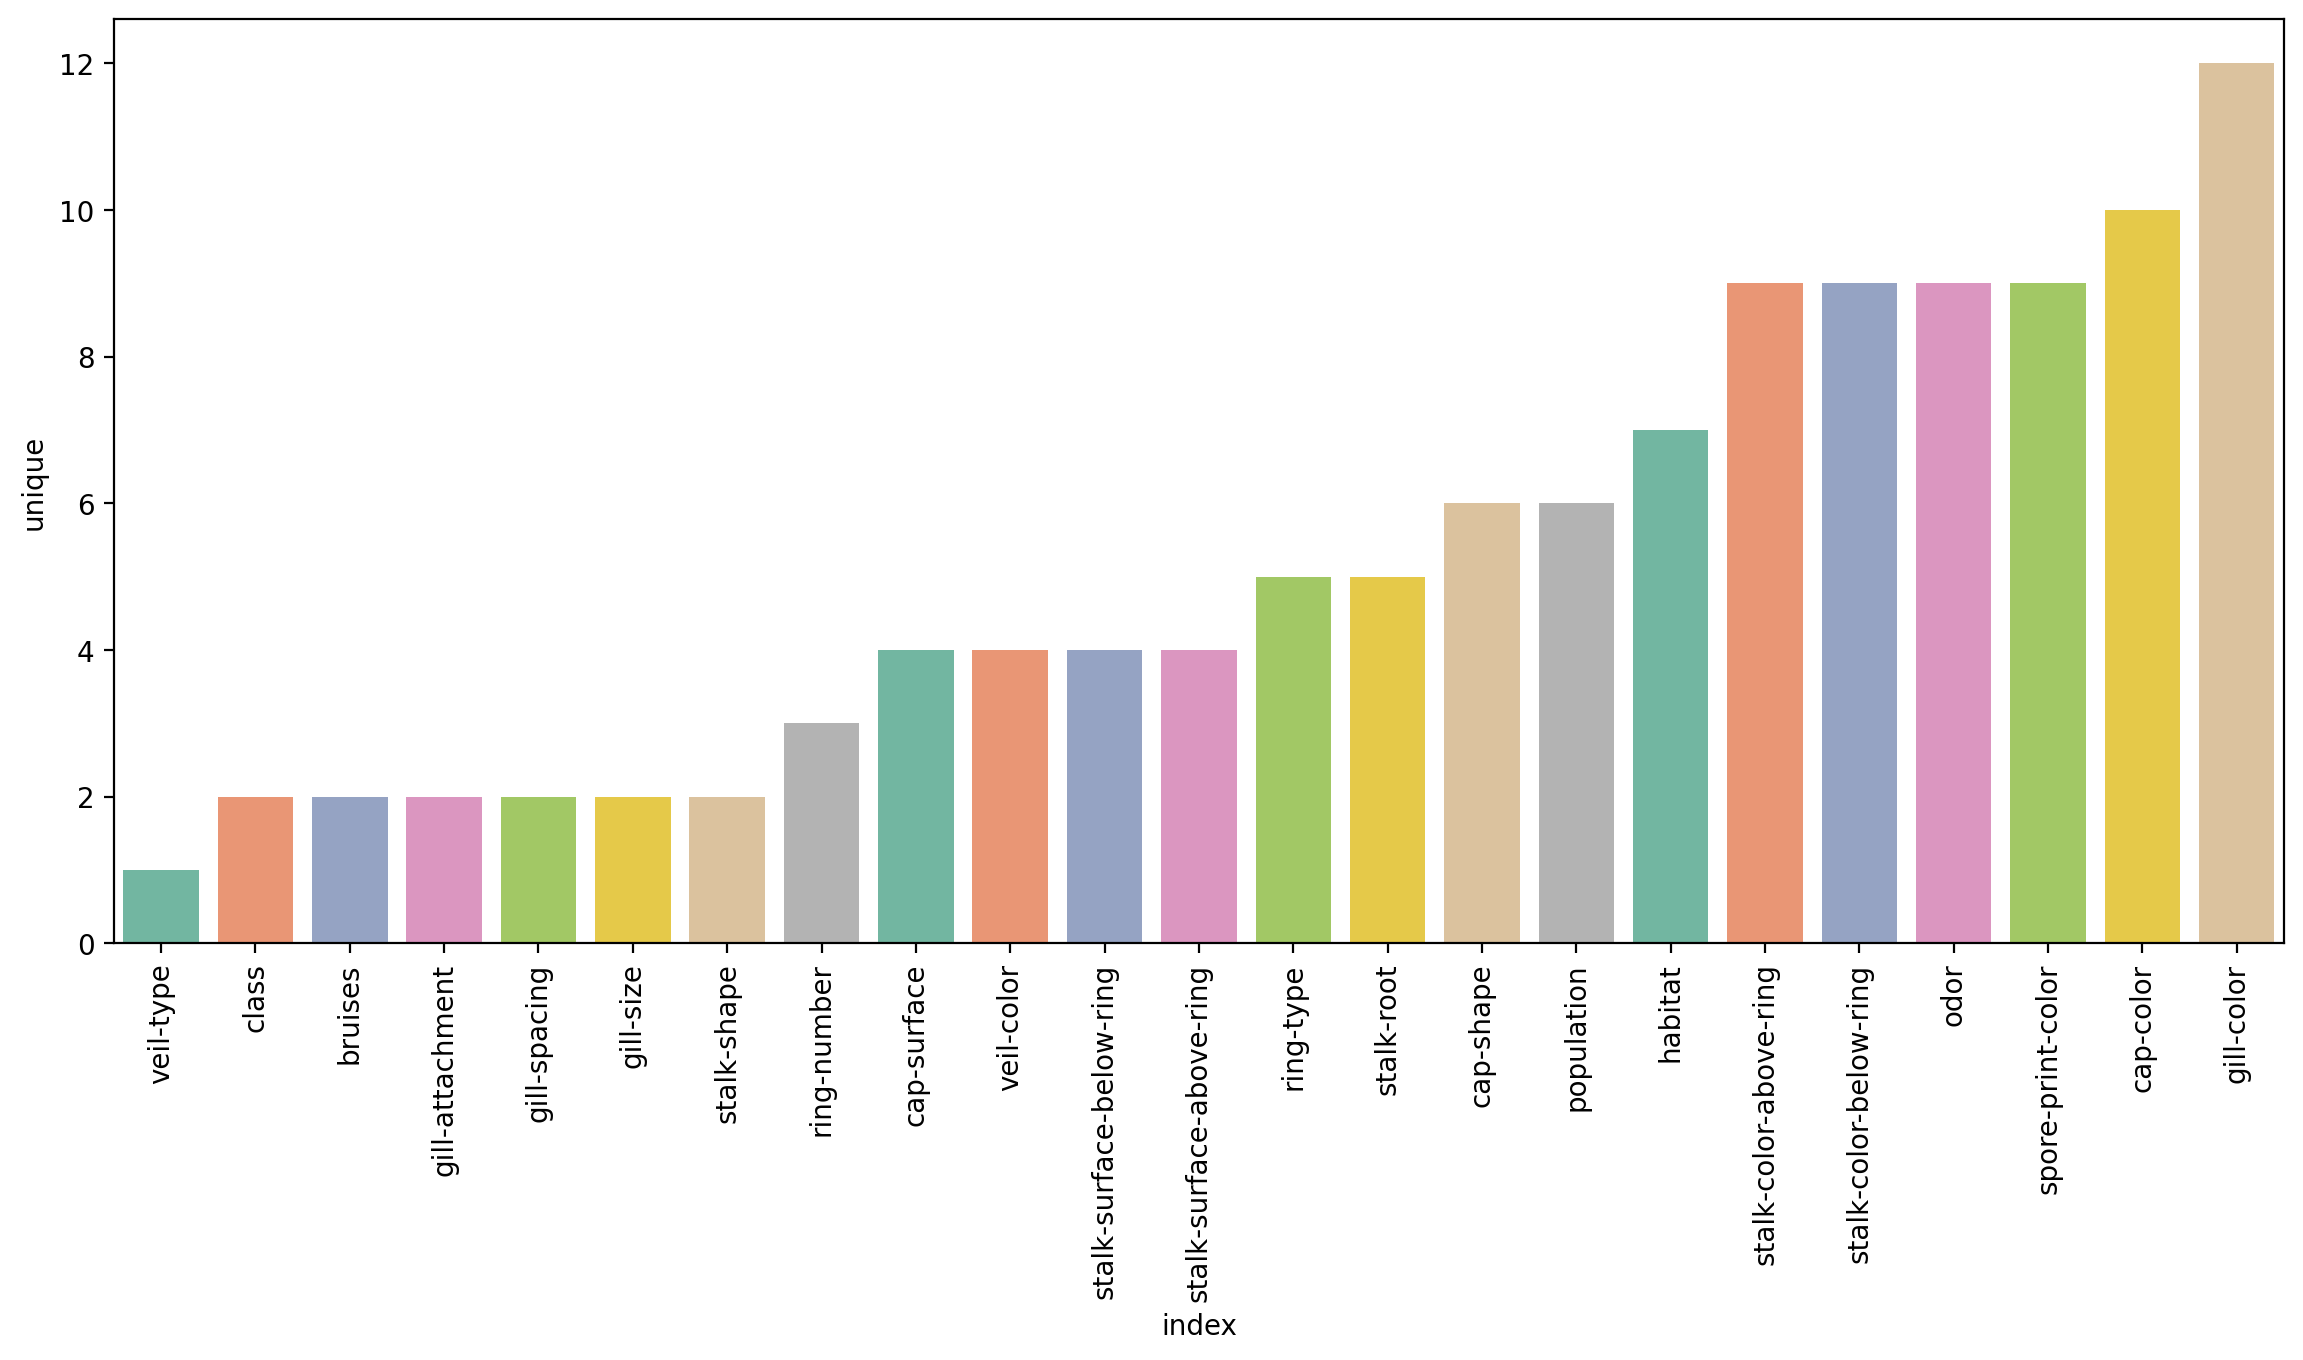

In [26]:
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=feat_unique, x='index', y='unique', palette='Set2');
plt.xticks(rotation=90);

In [55]:
X = df.drop('class', axis=1)
X = pd.get_dummies(X, drop_first=True, dtype=int)
y = df['class']
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [56]:
# Train and Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [57]:
# Create Model

from sklearn.ensemble import AdaBoostClassifier

# this model takes a model(best_estimator which is mostly desicion tree with max_depth=1(1 node and 2 leaves)(default))
# n_estimators means how many trees to be made in the model
# if n_estimators=1 it will choose only one feature and make a tree based on it
model = AdaBoostClassifier(n_estimators=1)
model.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=1)

error is: 0.12223133716160783
              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



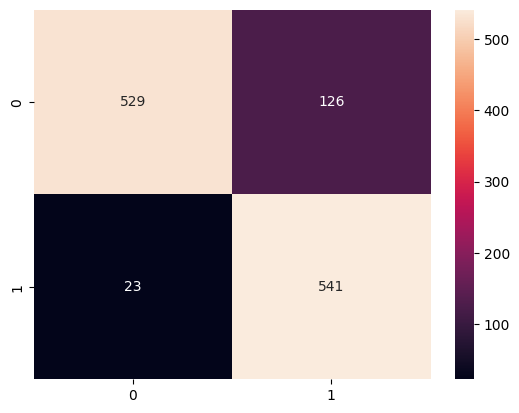

In [64]:
y_pred = model.predict(X_test
                       )
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

error = 1 - accuracy_score(y_test, y_pred)
print(f'error is: {error}')
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f');

In [73]:
# our f1-score is pretty good based on only 1 feature
# let's see what that feature is

print(model.feature_importances_)
print(model.feature_importances_.argmax())
print(X.columns[22]) # mushrooms odor indicaets if that mushroom is poisonous or not

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
22
odor_n


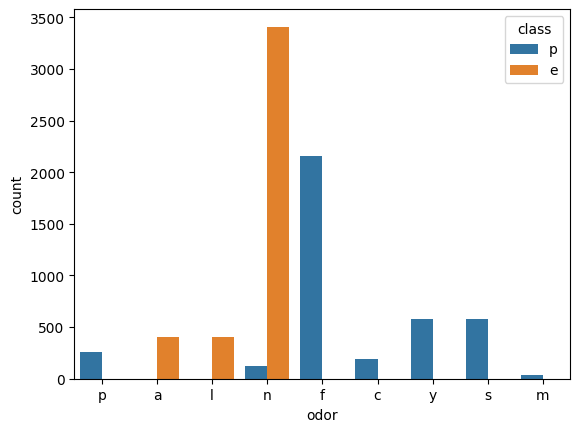

In [86]:
sns.countplot(data=df, x='odor', hue='class');
# only in 'n' there is a little poisonous mushrooms and others are non-poisonous
# that is the reason why our f1-score is not 100%
# so it chose best parameter on its own

In [87]:
len(X.columns)

95

In [89]:
# testing different numbers of n_estimators

error_rates = []
for n in range(1, 96): # (we have 95 features)
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
                       
    error = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error)

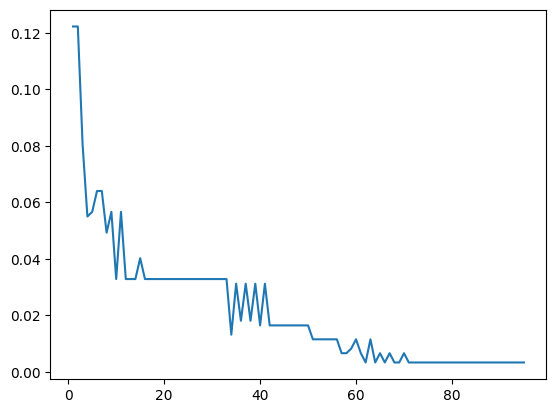

In [93]:
plt.plot(range(1, 96), error_rates);

In [103]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance'])
imp_feats = feats[feats['Importance'] > 0] # these features have impact in the model
imp_feats

,Importance
odor_c,0.087581
odor_f,0.154831
odor_l,0.032974
odor_n,0.075969
odor_p,0.085536
gill-spacing_w,0.014493
gill-size_n,0.047615
stalk-shape_t,0.022613
stalk-root_c,0.019609
stalk-surface-above-ring_k,0.041459


/tmp/ipykernel_16315/1494020100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=imp_feats.index, y='Importance', data=imp_feats.sort_values(by='Importance'), palette='Set2')


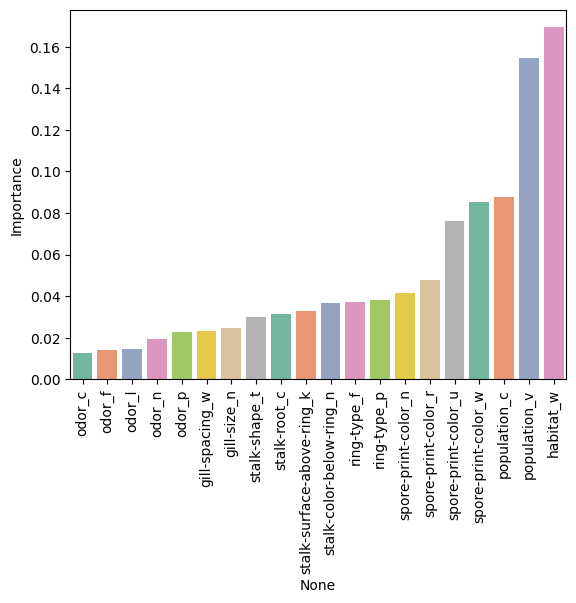

In [113]:
# in n_estimator = 95, habitat has the most impact
sns.barplot(x=imp_feats.index, y='Importance', data=imp_feats.sort_values(by='Importance'), palette='Set2')
plt.xticks(rotation=90);